이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 신경망 시작하기: 분류와 회귀

## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋
인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용하겠습니다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있습니다.

**IMDB 데이터셋 로드하기**

매개변수 num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미입니다. 드물게 나타나는 단어는 무시하겠습니다. 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있습니다.

변수 train_data와 test_data는 리뷰의 목록입니다. 각 리뷰는 단어 인덱스의 리스트입니다(단어 시퀀스가 인코딩된 것입니다). train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트입니다:

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
train_data.shape, test_data.shape

((25000,), (25000,))

1. 전체 5만 개의 리뷰글에서 단어들에 대한 빈도 수를 센다.
2. 가장 많이 등장한 단어는 1, 그 다음 단어는 2, ..... 빈도가 9999번 째인 단어는 9999라는 정수를 부여한 사전을 만든다. {word:index}
3. 리뷰에 있는 각 단어를 정수로 바꾼다.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

위 정수값을 갖는 첫 리뷰는 긍정 리뷰라고 1로 표시되어 있다.

In [4]:
train_labels[0]

1

전체 리뷰에서 최대 정수값은 얼마일까?

In [5]:
data = [[2,3,55, 92,7], [71,32,2,101,18]]
# max([2,3,55, 92,7])
max([max(rv) for rv in data])

101

가장 자주 등장하는 단어 10,000개로 제한했기 때문에 단어 인덱스는 10,000을 넘지 않습니다:

In [6]:
max([max(sequence) for sequence in train_data])

9999

**리뷰를 다시 텍스트로 디코딩하기**

첫 3개의 정수(1, 2, 3)은 특수 기호를 표시하도록 코딩되었다. 따라서 리뷰 안의:
- 1, 2, 3은 ?로 표기되고
- 4는 1의 word값으로 5는 2의 word 값으로 표기된다.



In [7]:
word_index = imdb.get_word_index()
dict([(v, k) for k, v in word_index.items()])

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
# reverse_word_index.get(2-3, '?')

In [9]:
word_index = imdb.get_word_index()  # {w:i}
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # {i:w}
# 리뷰를 디코딩합니다.
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**자연어 처리 절차**

1. 수집(크롤링, API 방법) : 문장들(긴 문자열)의 리스트
2. 사전(vocabulary) 작성
 - 각 문장들을 공백으로 자르고, 토큰(단어)들의 빈도수를 계산
 - 빈도수가 높은 순으로 정렬하고
 - 정렬 순서에 때라 1부터 정수 부호를 매핑하여 사전을 생성
3. 문장의 정수화 : 각 문장에 있는 단어들을 사전의 정수 부호로 변경
4. 문장의 길이(max_length)를 고정
 - max_length 보다 긴 문장은 truncate
 - max_lenght 보다 작은 문장은 zero-padding
5. 심볼릭한 정수를 sparce한 표현으로 변경
 1. one-hot encoding
 2. 문장에 등장한 사전에 있는 단어들의 빈도표 (단어 순서 - 문맥을 무시)
 3. 문장에 등장한 사전에 있는 단어들의 출현여부표 (순서, 빈도 무시)
 4. 빈도와 해당 문장에서 고유하게 출현한 여부를 섞은 tfidf 표
 5. [word2vec](https://word2vec.kr/search/) 등 단어를 50 or 100 or 300 or 1000 차원의 의미공간(mani-fold)에서의 벡터로 표현


In [10]:
import numpy as np
# voc size가 10이라 하면
docs = np.array([[0,1,5,3,2],
                 [8,6,4,9,4]])
docs

array([[0, 1, 5, 3, 2],
       [8, 6, 4, 9, 4]])

one-hot 인코딩을 한다면:

In [11]:
def onehoted(docs, voc_size=10):
    ret = []
    for doc in docs:
        tmp = np.zeros(10)
        tmp[doc] = 1
        ret.append(tmp)
    return np.array(ret)

(2, 5) ==> (2, 5, 10) : 정보 손실이 없음
- 2 : 문장의 수
- 5 : 각 문장의 단어 수
- 10 : 사전의 수

In [12]:
onehotdocs = np.array([onehoted(doc) for doc in docs])
onehotdocs

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]])

In [13]:
docs

array([[0, 1, 5, 3, 2],
       [8, 6, 4, 9, 4]])

### 데이터 준비

#### 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
3의 방법인 단어의 출현여부 표를 작성한다.

(n, l~m) ==> (n, v)
- n : 문장의 수
- l, m : 각 문장의 최소 단어수, 최대 단어수
- v : 사전의 크기



In [14]:
type(train_data[0])

list

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # i 번째 문서에서 j 번째 단어가 출현했어.
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train_ = vectorize_sequences(train_data)

In [17]:
np.all(x_train == x_train_)

True

1번과 2번 단어가 첫번째 문서에 등장했다는 것을 알 수 있다.

In [18]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 10000), (25000,), (25000, 10000), (25000,))

### 신경망 모델 만들기
![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

**모델 정의하기**

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu", input_dim=10000),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


- w1.shape = (10000, 16), b1.shape = (16, )
- num of h1's params = 160000 + 16 = 160016

**모델 컴파일하기**

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [24]:
x_train.shape

(25000, 10000)

데이터 자르기:
- train 25000, test 25000 개의 데이터가 있음
- train에서 첫 10000개를 평가용, 나머지 15000개를 학습용으로 잘랐다.

데이터의 용도:
- 학습용: 모델에게 정답을 보여줘서 올바른 학습 파라미터를 설정하도록 해주는 데이터
- 평가용: 매 학습 마다, 모델이 얼마나 학습을 잘했는 지 시험을 보는 데이터
- 테스트용: 학습이 끝 난후, 실제 모델이 얼마나 정확한 지 테스트하기 위한 데이터

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련하기**

In [26]:
15000 // 512 + 1

30

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 58ms/step - loss: 0.5241 - accuracy: 0.7782 - val_loss: 0.4002 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3296 - accuracy: 0.8921 - val_loss: 0.3180 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2460 - accuracy: 0.9188 - val_loss: 0.3009 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2018 - accuracy: 0.9312 - val_loss: 0.2787 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1679 - accuracy: 0.9459 - val_loss: 0.2820 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1444 - accuracy: 0.9541 - val_loss: 0.2832 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1227 - accuracy: 0.9626 - val_loss: 0.2981 - val_accuracy: 0.8804
Epoch 8/20
30

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련과 검증 손실 그리기**

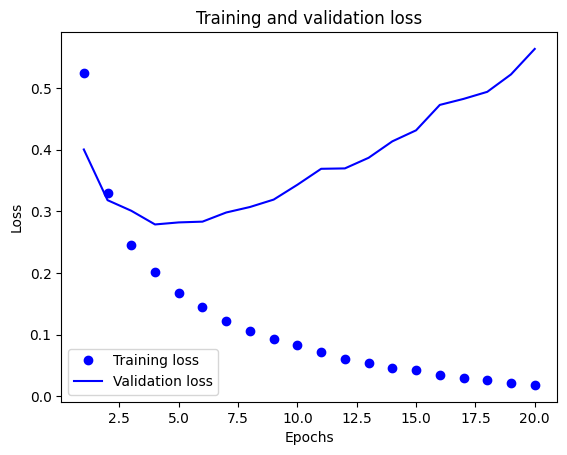

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

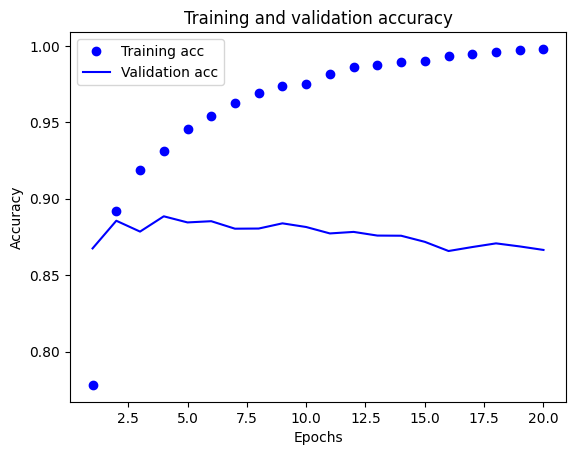

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<Axes: >

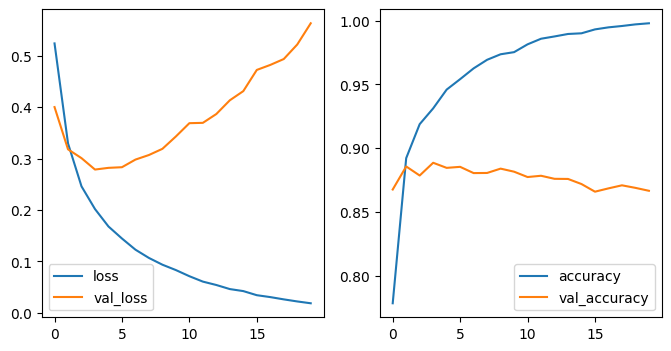

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
tmp = pd.DataFrame(history.history)

fig, axes = plt.subplots(1,2, figsize=(8, 4))
tmp[['loss', 'val_loss']].plot(ax=axes[0])
tmp[['accuracy', 'val_accuracy']].plot(ax=axes[1])

<Axes: >

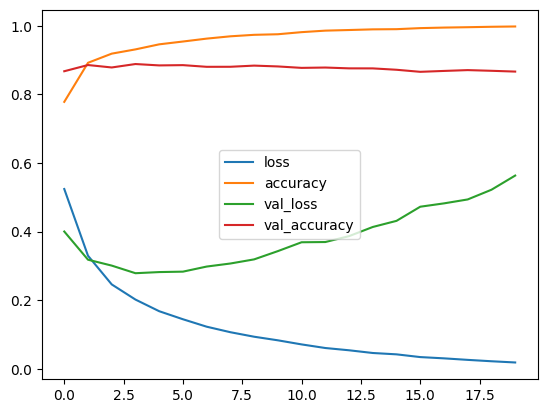

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
# d = {k1;vs1, k2:vs2,....}
# pd.DataFrame(d) : k 컬럼명, vs이 컬럼의 값. 사전의 한 성분은 하나의 컬럼을 구성
history.history

{'loss': [0.5241464972496033,
  0.3295855224132538,
  0.24598686397075653,
  0.20180553197860718,
  0.16786684095859528,
  0.14444832503795624,
  0.12273897975683212,
  0.10663651674985886,
  0.09349634498357773,
  0.08302564173936844,
  0.07108987122774124,
  0.06058019772171974,
  0.053971994668245316,
  0.04604801535606384,
  0.04212122783064842,
  0.034143202006816864,
  0.03044538013637066,
  0.026009226217865944,
  0.021979160606861115,
  0.018411293625831604],
 'accuracy': [0.7781999707221985,
  0.892133355140686,
  0.9187999963760376,
  0.9312000274658203,
  0.9459333419799805,
  0.9541333317756653,
  0.9625999927520752,
  0.9693333506584167,
  0.9736666679382324,
  0.9753333330154419,
  0.9814666509628296,
  0.9858666658401489,
  0.987666666507721,
  0.9896000027656555,
  0.9901333451271057,
  0.9932000041007996,
  0.9947999715805054,
  0.9958666563034058,
  0.9971333146095276,
  0.9980000257492065],
 'val_loss': [0.4002380967140198,
  0.3180299699306488,
  0.30085060000419617

In [34]:
# df.plot() 각 컬럼이 값이 y가 되고, 인덱스가 x가 되는 라이플랏을 컬럼의 갯수만큼 그려주고
# - 자동으로 색을 달리하며, 컬럼명으로 범례를 생성해준다.
tmp

,loss,accuracy,val_loss,val_accuracy
0,0.524146,0.778200,0.400238,0.8675
1,0.329586,0.892133,0.318030,0.8856
2,0.245987,0.918800,0.300851,0.8785
3,0.201806,0.931200,0.278660,0.8885
4,0.167867,0.945933,0.281970,0.8845
5,0.144448,0.954133,0.283212,0.8853
6,0.122739,0.962600,0.298052,0.8804
7,0.106637,0.969333,0.306953,0.8805
8,0.093496,0.973667,0.318985,0.8839
9,0.083026,0.975333,0.343067,0.8815


**모델을 처음부터 다시 훈련하기**

In [35]:
import gc
del x_train_, model, tmp, history
gc.collect()

9166

In [36]:
from tensorflow.keras import backend as K

# gpu 메모리 해제
K.clear_session()

In [37]:
# from numba import cuda
# device = cuda.get_current_device()
# device.reset()

In [38]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# partial_train, val로 밨을 때는 epochs=4일 때가 적절
model.fit(x_train, y_train, epochs=5, batch_size=128)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
196/196 [==============================] - 3s 8ms/step - loss: 0.3610 - accuracy: 0.8551
Epoch 2/5
196/196 [==============================] - 1s 7ms/step - loss: 0.2129 - accuracy: 0.9191
Epoch 3/5
196/196 [==============================] - 1s 6ms/step - loss: 0.1711 - accuracy: 0.9366
Epoch 4/5
196/196 [==============================] - 1s 6ms/step - loss: 0.1430 - accuracy: 0.9474
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3981 - accuracy: 0.8641


[0.39811617136001587, 0.864080011844635]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [39]:
preds = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [40]:
preds.shape, y_test.shape

((25000, 1), (25000,))

[Quiz] 이전처럼 잘 못 예측된 리뷰를 test에서 확인하고:
- 이때의 확률값은 어떠했으며,
- 실제 리뷰 중의 하나를 영어로 변환하여 왜 잘 못된 예측이 수행되었는 지 확인해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [42]:
yhats = np.where(preds > .5, 1, 0).reshape((-1,))
yyhat = pd.DataFrame({'y':y_test.astype('int'), 'yhat':yhats, 'proby1':preds.reshape((-1,))})
yyhat.head()

,y,yhat,proby1
0,0,0,0.070071
1,1,1,0.999716
2,1,1,0.940356
3,0,1,0.979516
4,1,1,0.972118


3번 색인의 리뷰가 강한 확신으로 긍정을 예측했다. 구글 번역으로 보면:
- ($\hat y$ = 1) : 이런 종류의 영화는 일반적으로 좋아하지만, 주인공 여자 아이의 죽음도 긍정적이지만,
- (y = 0) : 어머니가 아이를 방치한 것 하며, 영화관의 관람질이 나뻐서 스크린을 걷어차고 싶었다.

In [ ]:
testrv3 = ' '.join([reverse_word_index.get(i-3, '?') for i in test_data[3]])
print(testrv3)

? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night vision


### 추가 실험
1. layer의 깊이를 줄이거나 늘린다.
2. units의 수를 줄이거나 늘린다.
3. loss를 mse를 써본다.
4. optimizer를 바꾸거나 learningrate를 늘리거나 줄여본다.

In [43]:
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [44]:
def tunemodel(n_layer=2, units=[16, 16], optimizer='rmsprop', learning_rate=0.001):
    m = keras.models.Sequential()
    if len(units) >= n_layer:
        units = units[:n_layer]
    else:
        rest = n_layer - len(units)
        units = units + [units[-1]]*rest

    for j in range(n_layer):
        if j == 0:
            m.add(keras.layers.Dense(units[j], activation='relu', input_dim=10000))
        else:
            m.add(keras.layers.Dense(units[j], activation='relu'))
    m.add(keras.layers.Dense(1, activation='sigmoid'))

    if optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate)
    elif optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    elif optimizer == 'nesterov':
        optimizer = SGD(learning_rate=learning_rate, nesterov=True)
    m.compile(optimizer=optimizer,
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
    return m


In [45]:
tunemodel(optimizer='nesterov')

In [46]:
m = tunemodel()
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [47]:
def retallparams(params):
    retall = []
    keys = params.keys()
    for i, k in enumerate(keys):
        if i == 0:
            for v in params[k]:
                d = {}
                d[k] = v
                retall.append(d)
        else:
            tmp = retall.copy()
            retall = []
            for d in tmp:
                for v in params[k]:
                    d = d.copy()
                    d[k] = v
                    retall.append(d)

    return retall

In [48]:
params = {'n_layer':[1, 2, 3],
          'units': [[8], [16], [32]],
          'optimizer': ['rmsprop', 'adam', 'nesterov'],
          'learning_rate':[.0001, .00001, .000001]}

In [50]:
allparam = retallparams(params)
print(len(allparam))
allparam

81


[{'n_layer': 1, 'units': [8], 'optimizer': 'rmsprop', 'learning_rate': 0.0001},
 {'n_layer': 1, 'units': [8], 'optimizer': 'rmsprop', 'learning_rate': 1e-05},
 {'n_layer': 1, 'units': [8], 'optimizer': 'rmsprop', 'learning_rate': 1e-06},
 {'n_layer': 1, 'units': [8], 'optimizer': 'adam', 'learning_rate': 0.0001},
 {'n_layer': 1, 'units': [8], 'optimizer': 'adam', 'learning_rate': 1e-05},
 {'n_layer': 1, 'units': [8], 'optimizer': 'adam', 'learning_rate': 1e-06},
 {'n_layer': 1,
  'units': [8],
  'optimizer': 'nesterov',
  'learning_rate': 0.0001},
 {'n_layer': 1, 'units': [8], 'optimizer': 'nesterov', 'learning_rate': 1e-05},
 {'n_layer': 1, 'units': [8], 'optimizer': 'nesterov', 'learning_rate': 1e-06},
 {'n_layer': 1,
  'units': [16],
  'optimizer': 'rmsprop',
  'learning_rate': 0.0001},
 {'n_layer': 1, 'units': [16], 'optimizer': 'rmsprop', 'learning_rate': 1e-05},
 {'n_layer': 1, 'units': [16], 'optimizer': 'rmsprop', 'learning_rate': 1e-06},
 {'n_layer': 1, 'units': [16], 'optimiz

In [51]:
def gridSearch(tunf, x_train, y_train, params, test=(x_test, y_test)):
    params = retallparams(params)
    best = {}
    best['score']  = 0
    best['epoch']  = None
    for param in params:
        m = tunf(**param)
        h = m.fit(x_train, y_train, 512, 10, validation_data=(x_test, y_test))
        # maxidx : m 모델 학습시 val_accuracy가장 높은 epoch의 색인
        maxidx = np.argmax(h.history['val_accuracy'])
        s = h.history['val_accuracy'][maxidx]
        prtstr = f"current score is {s:6.4f} @ {param}"
        print(prtstr)
        if s > best['score']:
            best['score'] = s
            best['param'] = param
            best['epoch'] = maxidx + 1
            print(f'current best score is {s:6.4f} @ {param}')
        del m
        gc.collect()

    m = tunf(**best['param'])
    h = m.fit(x_train, y_train, 512, best['epoch'])
    best['model'] = m
    return best, h

In [52]:
best, h = gridSearch(tunemodel, x_train, y_train, params)

Epoch 1/10
49/49 [==============================] - 5s 75ms/step - loss: 0.6707 - accuracy: 0.6136 - val_loss: 0.6422 - val_accuracy: 0.7087
Epoch 2/10
49/49 [==============================] - 2s 37ms/step - loss: 0.6072 - accuracy: 0.7605 - val_loss: 0.5883 - val_accuracy: 0.7815
Epoch 3/10
49/49 [==============================] - 2s 32ms/step - loss: 0.5544 - accuracy: 0.8154 - val_loss: 0.5459 - val_accuracy: 0.8111
Epoch 4/10
49/49 [==============================] - 1s 29ms/step - loss: 0.5116 - accuracy: 0.8396 - val_loss: 0.5107 - val_accuracy: 0.8317
Epoch 5/10
49/49 [==============================] - 2s 46ms/step - loss: 0.4764 - accuracy: 0.8549 - val_loss: 0.4818 - val_accuracy: 0.8416
Epoch 6/10
49/49 [==============================] - 1s 27ms/step - loss: 0.4464 - accuracy: 0.8641 - val_loss: 0.4567 - val_accuracy: 0.8502
Epoch 7/10
49/49 [==============================] - 1s 28ms/step - loss: 0.4209 - accuracy: 0.8721 - val_loss: 0.4355 - val_accuracy: 0.8572
Epoch 8/10
49

In [53]:
best

{'score': 0.8876399993896484,
 'epoch': 9,
 'param': {'n_layer': 3,
  'units': [32],
  'optimizer': 'adam',
  'learning_rate': 0.0001},
 'model': <keras.engine.sequential.Sequential at 0x7f68189ae200>}

<Axes: >

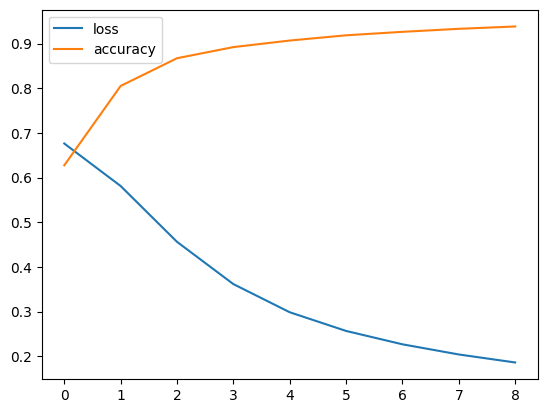

In [54]:
pd.DataFrame(h.history).plot()

### 정리
1. Sequencial로 모델생성
2. layers의 Dense로 레이어를 추가
     - 마지막 레이어의 출력의 수와 같게 units을 설정
3. 모델을 컴파일
4. 학습데이터로 epochs와 batch_size를 적절히 조절하여 학습
5. evaluate, predict를 이용한 평가와 예측


## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [ ]:
word_index = reuters.get_word_index()  # {w:i}
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # {i:w}
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

3

46개의 뉴스 topics을 분류하는 문제로서 매우 불균등한 라벨을 가지고 있다.

In [ ]:
import numpy as np
np.unique(train_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]))

### 데이터 준비

**데이터 인코딩하기**

문장을 사전에 있는 단어의 출현여부로 변경한 것

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩하기**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
x_train.shape, y_train.shape

((8982, 10000), (8982, 46))

In [ ]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [ ]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

### 모델 구성

**모델 정의하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000, )),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


**모델 컴파일하기**

- 타겟 y가 not onehoted : "sparce_categorical_crossentropy"
- 타겟 y가 onehotd : "categorical_crossentropy"

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.7723 - accuracy: 0.5188 - val_loss: 1.8527 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5046 - accuracy: 0.7026 - val_loss: 1.3516 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0943 - accuracy: 0.7671 - val_loss: 1.1366 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8507 - accuracy: 0.8251 - val_loss: 1.0171 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6719 - accuracy: 0.8632 - val_loss: 0.9501 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5379 - accuracy: 0.8911 - val_loss: 0.9561 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4340 - accuracy: 0.9132 - val_loss: 0.9114 - val_accuracy: 0.8010
Epoch 8/20
16

**훈련과 검증 손실 그리기**

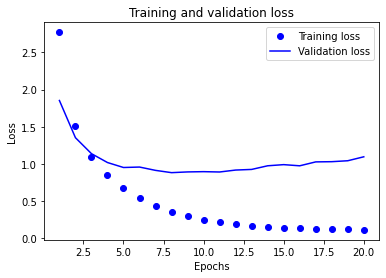

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

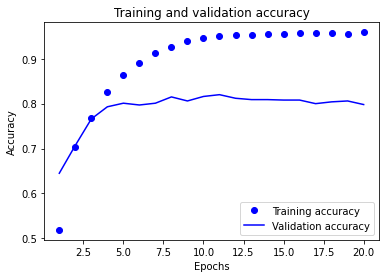

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

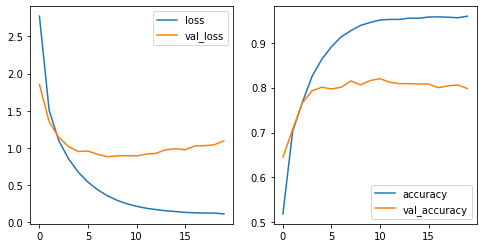

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
tmp = pd.DataFrame(history.history)

fig, axes = plt.subplots(1,2, figsize=(8, 4))
tmp[['loss', 'val_loss']].plot(ax=axes[0])
tmp[['accuracy', 'val_accuracy']].plot(ax=axes[1])

**모델을 처음부터 다시 훈련하기**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.4419 - accuracy: 0.5210
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3281 - accuracy: 0.7173
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9835 - accuracy: 0.7864
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7665 - accuracy: 0.8361
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6040 - accuracy: 0.8742
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4804 - accuracy: 0.9010
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3805 - accuracy: 0.9241
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3107 - accuracy: 0.9333
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.0152 - accuracy: 0.7778


In [ ]:
results

[1.0151540040969849, 0.777827262878418]

빈도기반으로 랜덤하게 예측할 때 - dummy classifier

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1923419412288513

### 새로운 데이터로 예측하기

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

3번 토픽인데, 4번 토픽으로 잘 못 예측하였다.

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

3

### 레이블과 손실을 다루는 다른 방법

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유

**정보 병목이 있는 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.4710 - accuracy: 0.0570 - val_loss: 3.1134 - val_accuracy: 0.0900
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.6586 - accuracy: 0.1342 - val_loss: 2.2123 - val_accuracy: 0.4440
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7049 - accuracy: 0.6396 - val_loss: 1.4911 - val_accuracy: 0.6640
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2380 - accuracy: 0.6966 - val_loss: 1.3348 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0699 - accuracy: 0.7170 - val_loss: 1.2892 - val_accuracy: 0.6840
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9532 - accuracy: 0.7440 - val_loss: 1.2752 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8583 - accuracy: 0.7871 - val_loss: 1.2699 - val_accuracy: 0.7150
Epoch 8/20
63/63 [==

### 추가 실험

### 정리

## 주택 가격 예측: 회귀 문제

### 보스턴 주택 가격 데이터셋

**보스턴 주택 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### 데이터 준비

**데이터 정규화하기**

sklearn의 StandardScaler를 적용한 것과 같다.

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 모델 구성

**모델 정의하기**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-겹 검증을 사용한 훈련 검증

**K-겹 검증하기**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[2.043560266494751, 2.443159580230713, 2.370878219604492, 2.459040641784668]

In [ ]:
np.mean(all_scores)

2.329159677028656

**각 폴드의 검증 점수를 저장하기**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
len(all_mae_histories)

4

**K-겹 검증 점수 평균을 기록하기**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**검증 점수 그래프 그리기**

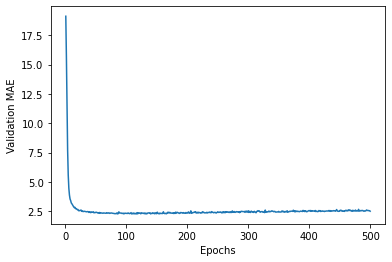

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

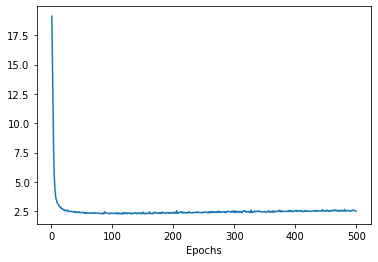

In [ ]:
average_mae_history = pd.DataFrame(all_mae_histories).mean(0)
average_mae_history.index = range(1, 501)
average_mae_history.name = 'Validation MAE'
average_mae_history.index.name = 'Epochs'
average_mae_history.plot()

**첫 10개의 epoch를 제외한 검증 점수 그래프 그리기**

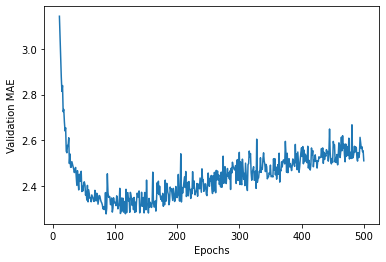

In [ ]:
truncated_mae_history = average_mae_history[10:]
truncated_mae_history.plot()
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
truncated_mae_history[:10]

Epochs
11    3.142121
12    3.052864
13    2.958030
14    2.876668
15    2.813741
16    2.839439
17    2.725251
18    2.735191
19    2.680749
20    2.641231
Name: Validation MAE, dtype: float64

**최종 모델 훈련하기**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.5197 - mae: 2.6927


In [ ]:
test_mae_score

2.6926536560058594

### 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([9.112118], dtype=float32)

In [ ]:
test_targets[0]

7.2

### 정리

## 요약